## 필요 라이브러리 import
- <span style="color:brown; font-style:italic;">필수</span>
    - pandas
    - numpy
    - maplotlib
    - seaborn
    - datatime
- <span style="color:brown; font-style:italic;">선택사항</span>
    - warnings
    - os

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import os
os.getcwd()
import datetime as dt

In [79]:
os.listdir('./origin')

['Customer_info.csv',
 'Discount_info.csv',
 'Marketing_info.csv',
 'Onlinesales_info.csv',
 'Tax_info.csv']

## 클래스 정의

In [80]:
class analysis:
    def __init__(self, csv):
        self.df = pd.read_csv(csv)
    
    ####### preprocessing
    

## 데이터 전처리
- <span style="color:brown; font-style:italic;">merge</span>
    - Onlinesales_info.csv
    - Customer_info.csv
    - Tax_info.csv
- <span style="color:brown; font-style:italic;">Feature Engineering</span>
    - 총 거래비용 = 평균금액 * 수량 * ( 1 + 세금 ) + 배송료

In [81]:
Onlinesales_info = pd.read_csv('./origin/Onlinesales_info.csv')
Customer_info = pd.read_csv('./origin/Customer_info.csv')
Tax_info = pd.read_csv('./origin/Tax_info.csv')
# display(Onlinesales_info.isnull().sum(), Onlinesales_info.shape)
# display(Customer_info.isnull().sum(), Customer_info.shape)
# display(Tax_info.isnull().sum(), Tax_info.shape)

In [82]:
first_merge = pd.merge(Onlinesales_info, Customer_info, on = '고객ID', how = 'outer')
total_information = pd.merge(first_merge, Tax_info, on = '제품카테고리', how = 'outer')
# display(first_merge.isnull().sum(), first_merge.shape)
# display(total_inforamtion.isnull().sum(), total_inforamtion.shape)

In [83]:
def col_list(target, feature): # merge 과정에서 컬럼의 누락 등이 발생했는지 확인
    for i in list(feature.columns):
        target.append(i)
    target_list = list(set(target))
    return target_list
check_list = []
check_list = col_list(check_list, Onlinesales_info)
check_list = col_list(check_list, Customer_info)
check_list = col_list(check_list, Tax_info)
list(set(total_information.columns)) == check_list

True

In [84]:
total_information['Total_Purchase_Amount'] = total_information['평균금액']*total_information['수량']*(1+total_information['GST']) + total_information['배송료']
# display(total_information, total_information.isnull().sum(), total_information.info())
total_information.to_csv('./preprocessing/total_information.csv', index=False)
total_information = pd.read_csv('./preprocessing/total_information.csv')
display(total_information, total_information.isnull().sum(), total_information.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   고객ID                   52924 non-null  object 
 1   거래ID                   52924 non-null  object 
 2   거래날짜                   52924 non-null  object 
 3   제품ID                   52924 non-null  object 
 4   제품카테고리                 52924 non-null  object 
 5   수량                     52924 non-null  int64  
 6   평균금액                   52924 non-null  float64
 7   배송료                    52924 non-null  float64
 8   쿠폰상태                   52924 non-null  object 
 9   성별                     52924 non-null  object 
 10  고객지역                   52924 non-null  object 
 11  가입기간                   52924 non-null  int64  
 12  GST                    52924 non-null  float64
 13  Total_Purchase_Amount  52924 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.7+ 

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05-04,Product_0850,More Bags,5,17.59,18.12,Clicked,여,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05-04,Product_0850,More Bags,1,17.59,6.00,Not Used,남,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05-19,Product_0850,More Bags,1,21.99,6.00,Used,여,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05-22,Product_0850,More Bags,1,17.59,51.99,Used,여,New York,46,0.18,72.7462


고객ID                     0
거래ID                     0
거래날짜                     0
제품ID                     0
제품카테고리                   0
수량                       0
평균금액                     0
배송료                      0
쿠폰상태                     0
성별                       0
고객지역                     0
가입기간                     0
GST                      0
Total_Purchase_Amount    0
dtype: int64

None

# Cohort CSV 생성
- cohort.csv
- retention.csv
- co_purchase.csv

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
1,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
3,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
4,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
5,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
6,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.068966,0.045977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11
0,508514.7551,49784.6856,64142.5787,136619.1519,37938.0847,64941.1638,103192.3727,63845.5539,50049.6573,54859.6360,46675.3220,108822.663
1,347080.9714,10790.6607,15816.3338,27845.3921,29272.5815,52488.0460,30126.2571,54556.0959,20170.3275,33249.6095,55215.2866,NaN
2,378271.8279,49417.8369,45043.3898,37257.0493,57979.0999,84903.4851,58303.3383,47338.3423,28720.4471,42783.4613,NaN,NaN
3,290706.3843,28735.0564,20328.1163,36830.3649,31477.7593,36086.3232,18730.5268,64759.7279,21383.5292,NaN,NaN,NaN
4,247217.3724,8277.2382,15394.8251,18791.0656,20448.6132,44002.9696,43811.6734,13373.1959,NaN,NaN,NaN,NaN
5,236926.7848,13735.8622,16507.9096,19569.1335,12427.2960,43054.1566,18107.3596,NaN,NaN,NaN,NaN,NaN
6,185668.4481,18169.9318,8556.9241,17177.5039,27456.6556,33631.0107,NaN,NaN,NaN,NaN,NaN,NaN
7,243114.6476,12446.8954,13194.2294,33103.3770,19271.6494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,180805.4449,2284.4464,2963.5980,768.4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,265442.4406,11231.6505,3295.4565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


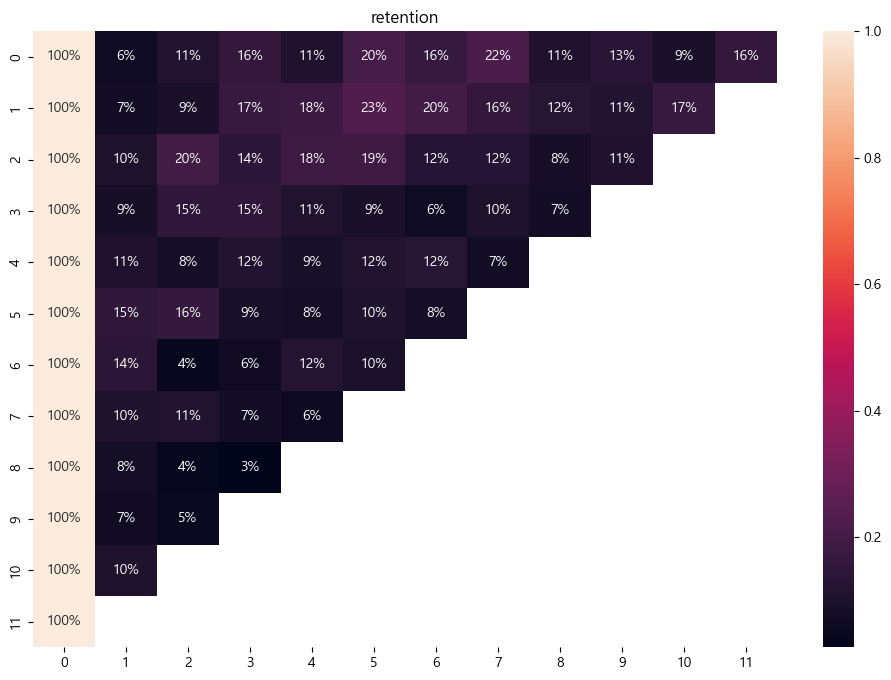

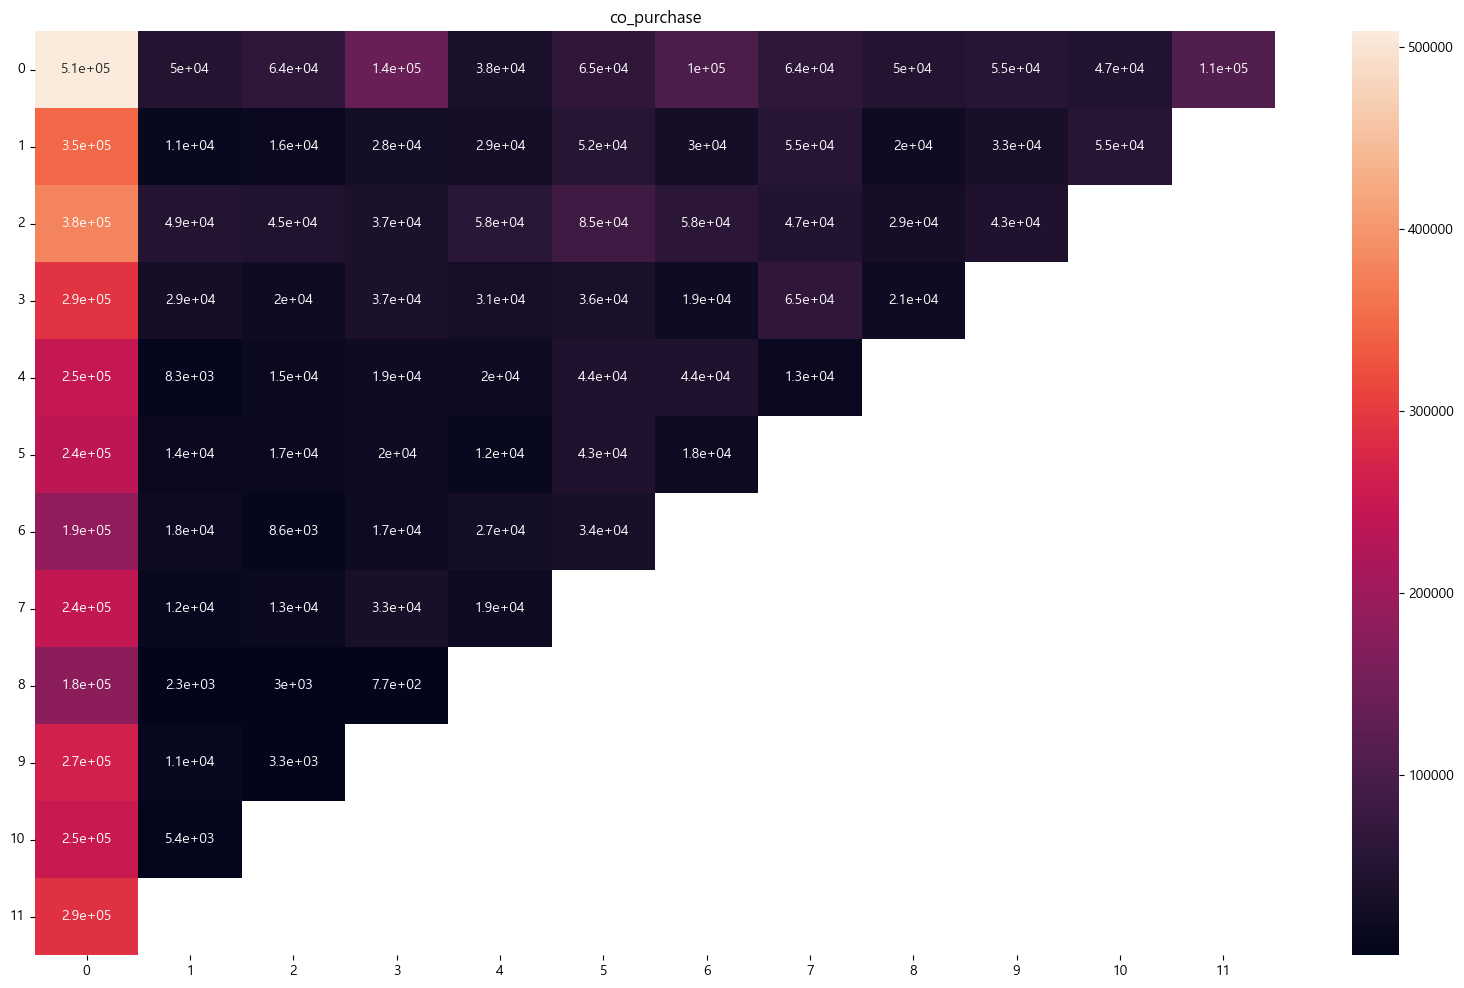

In [90]:
def First_OrderMonth(df, ref_month, customer_col): # 첫 주문월과 구매 주기 컬럼 추가
    df[ref_month] = pd.to_datetime(df[ref_month])
    df['OrderCycle'] = df['거래날짜'].dt.strftime('%Y-%m')
    first_order = df.groupby(customer_col)[ref_month].min()
    first_order = first_order.dt.strftime('%Y-%m')
    df.set_index(customer_col, inplace = True)
    df['First_Order'] = first_order
    df.reset_index(inplace=True)
    return df

def CohortPeriod(df, first_order, order_cycle): # 코호트 주기 계산
    temp = []
    for i in range(df.shape[0]):
        f_first_order = pd.to_datetime(df[first_order][i]).to_period('M')
        f_order_cycle = pd.to_datetime(df[order_cycle][i]).to_period('M')
        month_diff = (f_order_cycle-f_first_order).n
        temp.append(month_diff)
    df['CohortPeriod'] = temp
    return df

def CohrotFrame(df, first_order, target_col, cohort_period, ratio=None): # pandas unstack 진행
    df = df.set_index([first_order, cohort_period])
    df = df[target_col].unstack(1)
    if ratio is not None:
        df = df.div(df[0], axis=0)
    return df
    
cohort = total_information.drop([ '수량', '제품카테고리', '평균금액', '배송료', '쿠폰상태', '성별', '고객지역', '가입기간', 'GST'], axis=1)
cohort = First_OrderMonth(cohort, '거래날짜', '고객ID')
# 예시) 첫 주문월이 1월인 고객 중에서 2월에 다시 방문한 고객의 숫자, 첫 주문월에 X원만큼 쓴 고객이 2월에 쓴 금액
co1, co2 = cohort.groupby(['First_Order', 'OrderCycle'])['고객ID'].nunique(), cohort.groupby(['First_Order', 'OrderCycle'])['Total_Purchase_Amount'].sum()
co1, co2 = co1.reset_index() , co2.reset_index()
co = pd.merge(co1, co2, on = ['First_Order', 'OrderCycle'])

co = CohortPeriod(co, 'First_Order', 'OrderCycle') # 코호트 주기 계산
co.rename({'고객ID':'TotalUsers'}, axis = 1,inplace=True)

co.to_csv('./preprocessing/cohort.csv', index=False) # 코호트 csv 저장
co = pd.read_csv('./preprocessing/cohort.csv')
# display(co, co.isnull().sum(), co.info())

retention, co_purchase = CohrotFrame(co, 'First_Order', 'TotalUsers', 'CohortPeriod', ratio = True), CohrotFrame(co, 'First_Order', 'Total_Purchase_Amount', 'CohortPeriod', ratio = None)
retention.to_csv('./preprocessing/retention.csv', index=False)
co_purchase.to_csv('./preprocessing/co_purchase.csv', index=False)
retention, co_purchase = pd.read_csv('./preprocessing/retention.csv'), pd.read_csv('./preprocessing/co_purchase.csv')
display(retention, co_purchase)

plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(retention, annot=True, fmt = '.0%')
plt.title('retention')
plt.show()

plt.rcParams['figure.figsize'] = (20,12)
sns.heatmap(co_purchase, annot=True)
plt.title('co_purchase')
plt.yticks(rotation=360)
plt.show()